# Цель

изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Постройте модель и оцените качество модели с использованием кросс-валидации.
5. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

Для данной задачи выберем датасет с красными винами

In [2]:
data = pd.read_csv('../data/winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.shape

(1599, 12)

In [6]:
wine_target = data['quality']
del data['quality']

In [7]:
wine_target[:10]

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Разделяем выборку на обучающую и тестовую

In [9]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(data, wine_target, test_size=0.3, random_state=1)

Обучаем модель ближайших соседей для произвольно заданного гиперпараметра k=3
Оценим качество модели с помощбю MAE

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
model_1 = KNeighborsClassifier(n_neighbors=3)
model_1.fit(wine_X_train, wine_y_train)
target = model_1.predict(wine_X_test)
mean_absolute_error(wine_y_test, target)

0.58333333333333337

Строим модель и оценивем ее используя кросс-валидацию

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), data, wine_target, cv=5, scoring='mean_absolute_error')
scores, np.mean(scores)

(array([-0.63354037, -0.62305296, -0.63862928, -0.8081761 , -0.66561514]),
 -0.67380277164924562)

произведем подбор гиперпараметров используя GridSearch

In [12]:
from sklearn.model_selection import GridSearchCV
n_range = np.arange(1, 50)
turned_parametrs = [{'n_neighbors' : n_range}]
turned_parametrs

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}]

In [13]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), turned_parametrs, cv=5, scoring='mean_absolute_error')
clf_gs.fit(wine_X_train, wine_y_train)

CPU times: user 3.11 s, sys: 0 ns, total: 3.11 s
Wall time: 3.1 s


In [14]:
clf_gs.cv_results_

{'mean_fit_time': array([ 0.00178742,  0.00129266,  0.00114484,  0.00118623,  0.0011426 ,
         0.00118914,  0.00122261,  0.00116243,  0.00121493,  0.0011888 ,
         0.00119019,  0.00119557,  0.00119338,  0.00124426,  0.00125017,
         0.00116644,  0.00122519,  0.00136981,  0.00136666,  0.00161529,
         0.00120463,  0.00132117,  0.00120082,  0.00119681,  0.00124373,
         0.00121365,  0.00118818,  0.00126786,  0.00120974,  0.0012434 ,
         0.0012044 ,  0.00121074,  0.00135059,  0.00142961,  0.00154557,
         0.00128417,  0.00121279,  0.00123959,  0.00124121,  0.00123434,
         0.00124722,  0.00136862,  0.00139508,  0.00144577,  0.00123138,
         0.00124712,  0.0012464 ,  0.00124855,  0.00130863]),
 'mean_score_time': array([ 0.00229034,  0.00145583,  0.00146494,  0.00153103,  0.00159202,
         0.00173202,  0.00181117,  0.00173898,  0.00178766,  0.00183311,
         0.00187182,  0.0018918 ,  0.0020205 ,  0.0019866 ,  0.00203457,
         0.00206075,  0.00

In [15]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=34, p=2,
           weights='uniform')

In [16]:
# Лучшее значение метрики
clf_gs.best_score_

-0.55227882037533516

In [17]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 34}

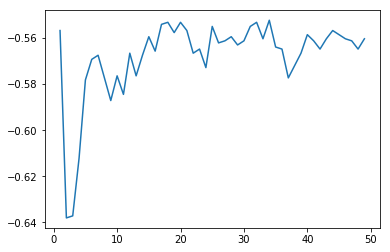

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])